In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from dateutil.relativedelta import relativedelta

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# We can view all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# We can view all of the classes that automap found
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
# # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [15]:

# Last Month
begin_date = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
begin_date

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= begin_date).\
                    group_by(Measurement.date).all()
prcp_data

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df.sort_index()
prcp_df

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


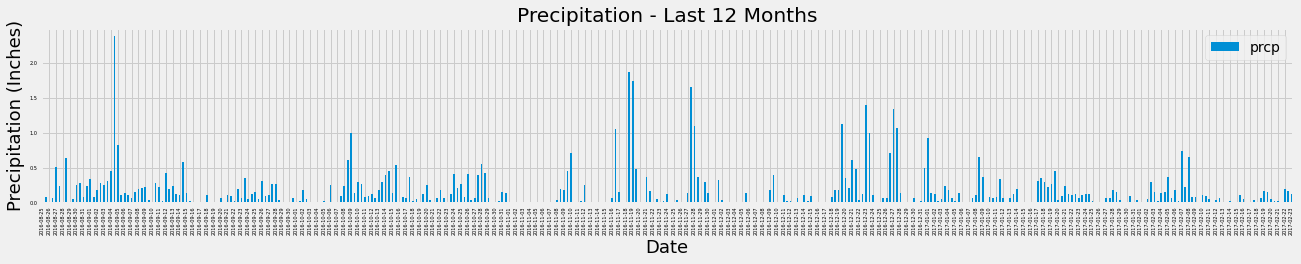

<Figure size 432x288 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
# Use DataFrame.plot() in order to create a bar chart of the data
from matplotlib import ticker
ax = prcp_df.plot(kind="bar", figsize=(20,3))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=0)
# Set a title for the chart
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.title("Precipitation - Last 12 Months")

plt.show()
plt.tight_layout()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df[["prcp"]].describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
last_12_temp= session.query(func.count(Measurement.tobs), Measurement.station, Measurement.tobs).\
                  filter(Measurement.date >= begin_date).\
                  group_by(Measurement.tobs).all()
last_12_temp                        

[(1, 'USC00516128', 58.0),
 (3, 'USC00519281', 59.0),
 (6, 'USC00519397', 60.0),
 (4, 'USC00519397', 61.0),
 (13, 'USC00519397', 62.0),
 (15, 'USC00519397', 63.0),
 (23, 'USC00519397', 64.0),
 (28, 'USC00519397', 65.0),
 (31, 'USC00519397', 66.0),
 (54, 'USC00519397', 67.0),
 (56, 'USC00519397', 68.0),
 (92, 'USC00519397', 69.0),
 (110, 'USC00519397', 70.0),
 (121, 'USC00519397', 71.0),
 (125, 'USC00519397', 72.0),
 (117, 'USC00519397', 73.0),
 (173, 'USC00519397', 74.0),
 (171, 'USC00519397', 75.0),
 (209, 'USC00519397', 76.0),
 (211, 'USC00519397', 77.0),
 (198, 'USC00519397', 78.0),
 (158, 'USC00519397', 79.0),
 (153, 'USC00519397', 80.0),
 (88, 'USC00519397', 81.0),
 (42, 'USC00519397', 82.0),
 (12, 'USC00519397', 83.0),
 (6, 'USC00519523', 84.0),
 (1, 'USC00519523', 85.0),
 (2, 'USC00519397', 87.0)]

In [24]:
highest_temp_observation = session.query(Measurement.station, Measurement.tobs).\
                    filter(Measurement.station == 'USC00519397').all()
highest_temp_observation

[('USC00519397', 65.0),
 ('USC00519397', 63.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 73.0),
 ('USC00519397', 70.0),
 ('USC00519397', 64.0),
 ('USC00519397', 68.0),
 ('USC00519397', 73.0),
 ('USC00519397', 64.0),
 ('USC00519397', 61.0),
 ('USC00519397', 66.0),
 ('USC00519397', 65.0),
 ('USC00519397', 68.0),
 ('USC00519397', 64.0),
 ('USC00519397', 72.0),
 ('USC00519397', 66.0),
 ('USC00519397', 66.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 71.0),
 ('USC00519397', 67.0),
 ('USC00519397', 76.0),
 ('USC00519397', 68.0),
 ('USC00519397', 72.0),
 ('USC00519397', 70.0),
 ('USC00519397', 67.0),
 ('USC00519397', 66.0),
 ('USC00519397', 67.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 64.0),
 ('USC00519397', 69.0),
 ('USC00519397', 73.0),
 ('USC00519397', 73.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 71.0),
 ('USC00519397',

In [25]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df = pd.DataFrame(highest_temp_observation, columns=['station', 'tobs'])
tobs_df.set_index('station', inplace=True)
tobs_df.sort_index()
tobs_df.head()

,tobs
station,
USC00519397,65.0
USC00519397,63.0
USC00519397,74.0
USC00519397,76.0
USC00519397,73.0


<function matplotlib.pyplot.show(*args, **kw)>

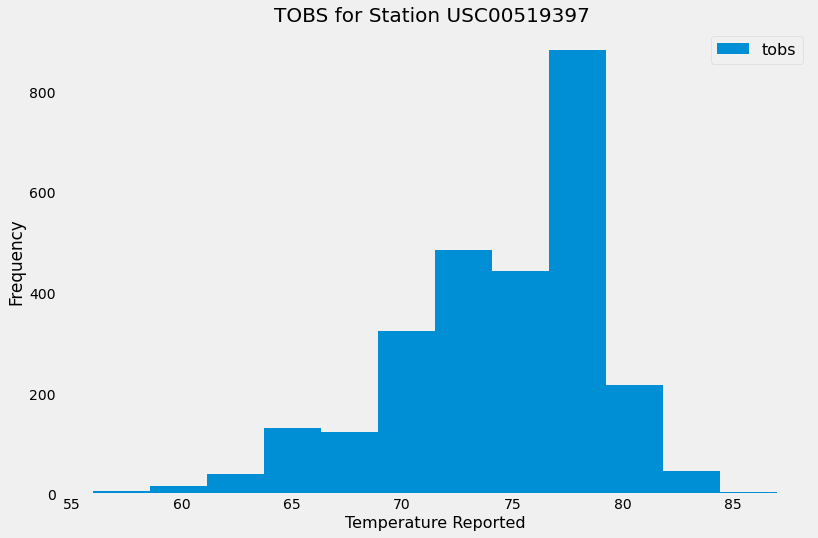

In [26]:
tobs_df.plot.hist(by='tobs', bins=12, figsize=(12,8))
plt.grid()
plt.title("TOBS for Station USC00519397 ", fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig
plt.show

## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results = calc_temps('2016-02-28', '2016-03-05')
trip_results

[(62.0, 69.88636363636364, 80.0)]

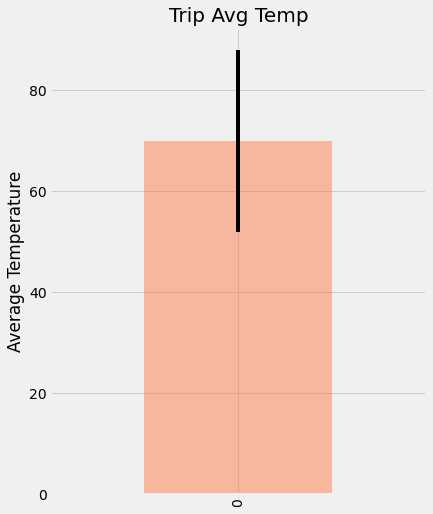

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Average Temperature")
plt.savefig
plt.show()